<a href="https://colab.research.google.com/github/yajima-yasutoshi/DataScience2025/blob/main/20251226/%E5%88%86%E6%9E%90%E8%AA%B2%E9%A1%8C1%E8%BF%BD%E5%8A%A0%E8%AA%B2%E9%A1%8C%E3%81%AE%E8%A7%A3%E7%AD%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 分析課題1の追加問題

# 準備

In [1]:
# インストール
!pip install japanize-matplotlib

# 必要なライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import scipy.stats as st

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 32.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=681102b74cf6039571c055eaf3c5a2d81e281cabdca75a92dde160c0c2fc34b4
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize-matplotlib


## データの読み込み

以下のセルを実行することで、
customer_data_2000.csv をデータフレーム変数 df に読み込む。

In [2]:
# インターネット上にあるファイルを指定する
url = 'https://raw.githubusercontent.com/yajima-yasutoshi/shunan-u/refs/heads/main/data/customer_data_2000.csv'

# df という変数に読み込むことにする
df = pd.read_csv(url)

このデータは、あるサイトに登録されている顧客に関して、顧客の属性とサービスの利用に関するデータである。顧客はIDが付与されており、重複が無いように管理されている。

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   顧客ID     2000 non-null   int64  
 1   性別       2000 non-null   object 
 2   年齢       2000 non-null   int64  
 3   職業       2000 non-null   object 
 4   年収       2000 non-null   int64  
 5   スマホの所有   2000 non-null   object 
 6   スマホ利用時間  2000 non-null   float64
 7   Aの利用回数   2000 non-null   int64  
 8   Bの利用回数   2000 non-null   int64  
 9   支払金額     2000 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 156.4+ KB


dfに格納されたレコード数を求めよ

dfに格納された項目数を求めよ


In [4]:
df.shape

(2000, 10)

最もレコード数の多い職業のレコード数を半角数字で解答せよ

In [5]:
df['職業'].value_counts()

,count
職業,
会社員,648
学生,280
公務員,270
パート・アルバイト,265
自営業,236
退職,206
その他,95


dfに格納されたデータで、職業が公務員または自営業の顧客数を求めよ。

In [34]:
df[ (df['職業']=='公務員') | (df['職業'] == '自営業') ].info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   顧客ID     506 non-null    int64  
 1   性別       506 non-null    object 
 2   年齢       506 non-null    int64  
 3   職業       506 non-null    object 
 4   年収       506 non-null    int64  
 5   スマホの所有   506 non-null    object 
 6   スマホ利用時間  506 non-null    float64
 7   Aの利用回数   506 non-null    int64  
 8   Bの利用回数   506 non-null    int64  
 9   支払金額     506 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 43.5+ KB


dfに格納されたデータで、
職業が公務員のスマホ使用時間の平均値求め、
小数点以下第三位を四捨五入し、半角文字で解答せよ

In [7]:
df[df['職業']=='公務員']['スマホ利用時間'].mean()

np.float64(1.7244444444444444)

dfに格納されたデータで、
職業が学生のBの利用回数の平均の信頼区間を求め、小数点以下第三位を四捨五入し、半角文字で解答せよ。
ただし信頼水準を95%とする。

In [8]:
import numpy as np
import scipy.stats as st

# 信頼水準を設定
confidence = 0.95
# 信頼区間を求めたいデータを変数「data」にセットする。
_data = df[df['職業']=='学生']['Bの利用回数']

# 標本平均と標準誤差を計算
mean = _data.mean()
sem = st.sem(_data)

# 信頼区間の導出
# scipy.stats.t.interval 関数を使用して、信頼区間を求める。
lower_bound, upper_bound = st.t.interval(confidence, df=_data.shape[0] - 1, loc=mean, scale=sem)

# 信頼区間を表示
print(f"信頼区間: ({lower_bound:.4f}, {upper_bound:.4f})")


信頼区間: (10.5120, 11.4023)


職業別に支払金額の平均を計算する。

In [9]:
df.groupby('職業')['支払金額'].mean().sort_values(ascending=False)

,支払金額
職業,
自営業,1062.033898
その他,1019.578947
会社員,1005.432099
公務員,973.518519
パート・アルバイト,601.018868
学生,498.928571
退職,300.097087


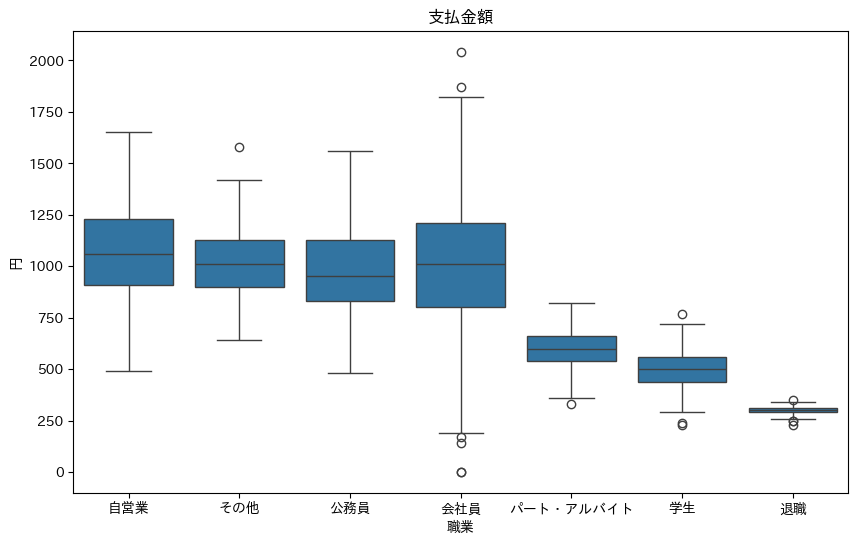

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='職業', y='支払金額')
plt.title('支払金額')
plt.xlabel('職業')
plt.ylabel('円')
plt.show()

dfに格納されたデータで、 職業が会社員のレコードで支払金額の平均値を求め、
小数点以下第一位を四捨五入し概数として、半角文字で解答せよ。


In [11]:
df[df['職業'] == '会社員']['支払金額'].mean()

np.float64(1005.4320987654321)

dfに格納されたデータで、 職業が自営業のレコードで支払金額の平均値を求め、
小数点以下第一位を四捨五入し概数として、半角文字で解答せよ。


In [12]:
df[df['職業'] == '自営業']['支払金額'].mean()

np.float64(1062.0338983050847)

dfに格納されたデータで、
t検定を使い、職業が会社員と自営業で支払金額の平均値に統計的に優位な差があるか確認する。
p 値を計算し、小数点以下第三位を四捨五入し、半角文字で解答せよ

In [13]:
# パッケージのインポート
from scipy import stats

# スマホ利用時間を比較
data_ji = df[df['職業'] == '自営業']['支払金額']
data_ko = df[df['職業'] == '会社員']['支払金額']

# t検定を実行
t_stat, p_value = stats.ttest_ind(data_ji, data_ko, equal_var=False)

print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_value:.5f}")


t-statistic: 3.08
p-value: 0.00218


In [14]:
# 分散が等しいか検定する
# パッケージのインポート
from scipy import stats

# 等分散性の検定
levene_stat, levene_p_value = stats.levene(data_ji, data_ko)
print(f"Levene's test statistic: {levene_stat:.2f}")
print(f"p-value: {levene_p_value:.5f}")

Levene's test statistic: 28.13
p-value: 0.00000


# Wineデータをつかった例

今回の演習では、sklearn に組み込まれているサンプルデータを用いる。
データの読み込みは、以下のように行う。

In [15]:
from sklearn.datasets import load_wine
# データの読み込み
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)

データの確認を行う。主な確認ポイントは以下の通りである。


*   レコード数
*   項目数
*   各項目の型
*   欠損値の有無
*   異常値の有無


In [16]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

## 利用するデータ概要

Wineデータセットは、イタリアの同じ地域で栽培された3種類のワインに
含まれる成分を測定したデータ。
13の項目がある。

| 項目                          | 説明                                       |
|---------------------------------|--------------------------------------------|
| Alcohol（アルコール）           | ワインに含まれるアルコールの量。           |
| Malic Acid（リンゴ酸）          | ワインに含まれるリンゴ酸の量。             |
| Ash（灰分）                     | ワインの灰分の量。                         |
| Alcalinity of Ash（灰分のアルカリ度） | 灰分のアルカリ度。                   |
| Magnesium（マグネシウム）       | ワインに含まれるマグネシウムの量。         |
| Total Phenols（総フェノール）   | ワインに含まれるフェノール類の総量。       |
| Flavanoids（フラバノイド）      | ワインに含まれるフラバノイドの量。         |
| Nonflavanoid Phenols（非フラバノイドフェノール） | ワインに含まれる非フラバノイドフェノールの量。 |
| Proanthocyanins（プロアントシアニン） | ワインに含まれるプロアントシアニンの量。 |
| Color Intensity（色の強度）     | ワインの色の強度。                         |
| Hue（色相）                     | ワインの色相。                             |
| OD280/OD315 of Diluted Wines（希釈ワインのOD280/OD315） | 希釈されたワインのOD280/OD315の比率。 |
| Proline（プロリン）             | ワインに含まれるプロリンの量。             |

### 基本統計量を得る

数値型の項目の場合、最小値や最大値、平均や標準偏差といった数値を**基本統計量**
と呼び、分析の前には必ず確認する必要がある。

In [17]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


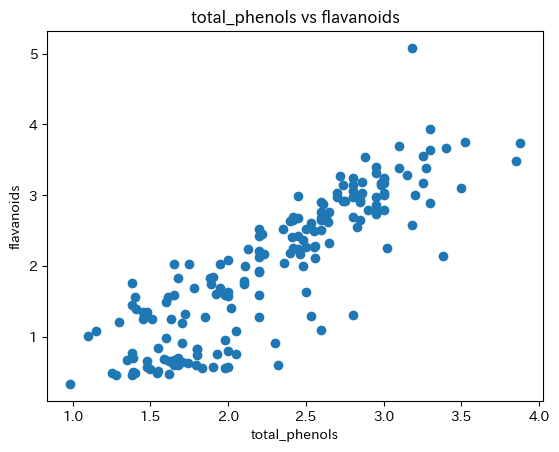

In [18]:
# total_phenols と flavanoids の散布図を描く

import matplotlib.pyplot as plt
# total_phenols	flavanoids
plt.scatter(wine_df['total_phenols'], wine_df['flavanoids'])
plt.xlabel('total_phenols')
plt.ylabel('flavanoids')
plt.title('total_phenols vs flavanoids')
plt.show()

In [19]:
# total_phenols	と flavanoids の相関係数を求める
wine_df[['total_phenols','flavanoids']].corr()

,total_phenols,flavanoids
total_phenols,1.000000,0.864564
flavanoids,0.864564,1.000000


In [20]:
wine_df['magnesium'].var()

203.9893353646925

In [21]:
# magnesium の四分位範囲を計算
wine_df[['magnesium']].quantile(0.75) - wine_df[['magnesium']].quantile(0.25)

,0
magnesium,19.0


項目 magnesium に外れ値があるか、箱ひげ図を描いて確認する。

<Axes: ylabel='magnesium'>

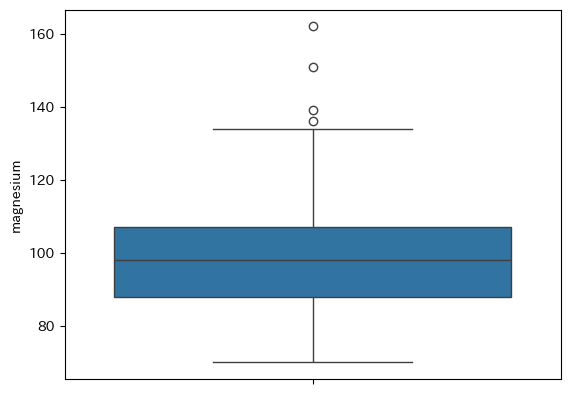

In [22]:
sns.boxplot(wine_df['magnesium'])

In [23]:
q3 = wine_df['magnesium'].quantile(0.75)
q1 = wine_df['magnesium'].quantile(0.25)

q3 + 1.5 * ( q3 - q1 )

np.float64(135.5)

In [24]:
wine_df.sort_values(by = 'magnesium', ascending=False)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
95,12.47,1.52,2.20,19.0,162.0,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937.0
69,12.21,1.19,1.75,16.8,151.0,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718.0
73,12.99,1.67,2.60,30.0,139.0,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985.0
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0
96,11.81,2.12,2.74,21.5,134.0,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,13.88,5.04,2.23,20.0,80.0,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415.0
67,12.37,1.17,1.92,19.6,78.0,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510.0
82,12.08,1.13,2.51,24.0,78.0,2.00,1.58,0.40,1.40,2.20,1.31,2.72,630.0
66,13.11,1.01,1.70,15.0,78.0,2.98,3.18,0.26,2.28,5.30,1.12,3.18,502.0


In [25]:
wine_df[wine_df['hue'] <= 0.6 ].shape

(17, 13)

In [26]:
wine_df[wine_df['hue'] <= 0.6]['color_intensity'].mean()

np.float64(8.858823470588234)

In [27]:
wine_df[(wine_df['hue'] > 0.3 ) & (wine_df['hue'] < 1.0)]['color_intensity'].median()

5.34

In [28]:
# 標準化に必要なライブラリーのインポート
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
# データの読み込み
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)

# 前処理（データの正規化）
X = wine_df

scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns = wine_df.columns)

<Axes: xlabel='Num of clusters', ylabel='Inertia'>

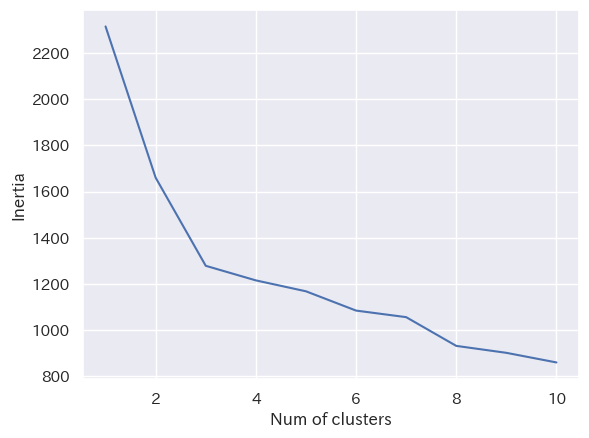

In [29]:
# クラスタリングに必要なライブラリーのインポート
from sklearn.cluster import KMeans

# Elbow Methodによるハイパーパラメータチューニング
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter = 200, n_init='auto', random_state=5)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# グリッド線を表示するスタイルに変更する
sns.set_style('whitegrid')
# sns.set_theme('paper')
sns.set(font='IPAexGothic')

# エルボー図のプロット
elbow = pd.DataFrame( inertia, columns = ['Inertia'])
elbow['Num of clusters'] = range(1,11)
sns.lineplot(data = elbow, x='Num of clusters', y= 'Inertia')

In [30]:
inertia

[2313.999999999999,
 1659.9511977619795,
 1278.7607763668154,
 1215.700363797342,
 1168.4880095286137,
 1085.0863638474752,
 1056.6774555127793,
 932.4021299191877,
 902.3698807168405,
 860.7558419448787]

In [31]:
# 最適なクラスタ数でKMeansクラスタリング（この例では、エルボーが3であると仮定）
best_n_clusters = 3  # エルボー図から選択
kmeans = KMeans(n_clusters=best_n_clusters, init='k-means++', max_iter = 200, n_init='auto', random_state=5)
kmeans.fit(X)

# クラスタラベルをデータフレームに追加
wine_df['cluster'] = kmeans.labels_

# 各クラスタの特徴を調査（平均値、標準偏差など）
wine_df.groupby('cluster').agg(['mean']).reset_index()

,cluster,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,13.711475,1.997049,2.453770,17.281967,107.786885,2.842131,2.969180,0.289180,1.922951,5.444590,1.067705,3.154754,1110.639344
1,1,12.240455,1.899697,2.246364,20.190909,93.136364,2.261818,2.095909,0.359394,1.627879,3.018939,1.060697,2.816818,509.484848
2,2,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824


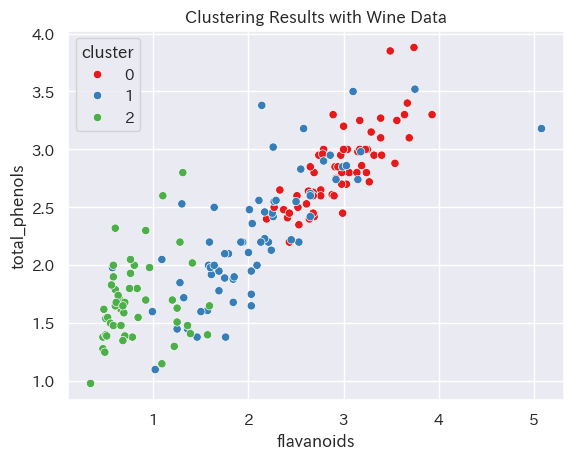

In [32]:
# 結果の可視化（seabornを使用）
sns.scatterplot(x='flavanoids', y='total_phenols', hue='cluster', data=wine_df, palette='Set1')
plt.title('Clustering Results with Wine Data')
plt.show()